In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
id,,,,,,,,,,,,
0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


In [4]:
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,35995,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,35996,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,35997,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,35998,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [61]:
df_kp = df_train.groupby(['Kelas Pekerja', 'Pendidikan'])

In [64]:
df_kp.size()

Kelas Pekerja  Pendidikan
1              0               10
               1               25
               2               87
               3               50
               4               75
                             ... 
8              11            1038
               12             202
               13              53
               14            9230
               15             273
Length: 103, dtype: int64

In [5]:
print(df_train.groupby('Umur').size())
print()
print(df_train.groupby('Kelas Pekerja').size())
print()
print(df_train.groupby('Berat Akhir').size())
print()
print(df_train.groupby('Pendidikan').size())
print()
print(df_train.groupby('Jmlh Tahun Pendidikan').size())
print()
print(df_train.groupby('Status Perkawinan').size())
print()
print(df_train.groupby('Pekerjaan').size())
print()
print(df_train.groupby('Jenis Kelamin').size())
print()
print(df_train.groupby('Keuntungan Kapital').size())
print()
print(df_train.groupby('Kerugian Capital').size())
print()
print(df_train.groupby('Jam per Minggu').size())
print()
print(df_train.groupby('Gaji').size())

Umur
17    432
18    621
19    767
20    836
21    848
     ... 
85      2
86      1
87      3
88      5
90     34
Length: 73, dtype: int64

Kelas Pekerja
?                                 2063
Pekerja Bebas Bukan Perusahan     2866
Pekerja Bebas Perusahaan          1273
Pemerintah Lokal                  2280
Pemerintah Negara                 1477
Pemerintah Provinsi               1066
Tanpa di Bayar                      15
Tidak Pernah Bekerja                 6
Wiraswasta                       24948
dtype: int64

Berat Akhir
12285      1
13492      1
13769      2
13862      1
14878      1
          ..
1210504    1
1268339    1
1366120    1
1484705    1
1490400    1
Length: 23365, dtype: int64

Pendidikan
10th                     1024
11th                     1315
12th                      478
1st-4th                   184
5th-6th                   388
7th-8th                   682
9th                       570
D3                       1175
D4                       1500
Doktor         

In [6]:
# pembagian umur menjadi 3 bagian interval
g,h = pd.cut(df_train['Umur'],3, labels=[1,2,3],retbins=True)
df_train['Umur']=pd.cut(df_train['Umur'],bins=h, labels=[1,2,3])
df_test['Umur']=pd.cut(df_test['Umur'],bins=h, labels=[1,2,3])

In [7]:
# fungsi untuk mengubah data kelas pekerja
# mengganti ? menjadi wiraswasta
def kelas_pekerja(data):
    data = data.replace('?', 8)
    data = data.replace('Pekerja Bebas Bukan Perusahan', 1)
    data = data.replace('Pekerja Bebas Perusahaan', 2)
    data = data.replace('Pemerintah Lokal', 3)
    data = data.replace('Pemerintah Negara', 4)
    data = data.replace('Pemerintah Provinsi', 5)
    data = data.replace('Tanpa di Bayar', 6)
    data = data.replace('Tidak Pernah Bekerja', 7)
    data = data.replace('Wiraswasta', 8)
    return data

In [8]:
df_train['Kelas Pekerja'] = kelas_pekerja(df_train['Kelas Pekerja'])
df_train.groupby('Kelas Pekerja').size()

Kelas Pekerja
1     2866
2     1273
3     2280
4     1477
5     1066
6       15
7        6
8    27011
dtype: int64

In [9]:
df_test['Kelas Pekerja'] = kelas_pekerja(df_test['Kelas Pekerja'])
df_test.groupby('Kelas Pekerja').size()

Kelas Pekerja
1     732
2     316
3     624
4     376
5     279
6       4
7       2
8    7266
dtype: int64

In [10]:
#Pembagian Berat Akhir menjadi 10 Kategori Interval 1-10
berat_label= [1,2,3,4,5,6,7,8,9,10]
df_test['Berat Akhir']=pd.qcut(df_test['Berat Akhir'],10, labels=berat_label)
df_train['Berat Akhir']=pd.qcut(df_train['Berat Akhir'],10, labels=berat_label)

In [11]:
def pendidikan(data):
    data = data.replace('1st-4th', 0)
    data = data.replace('5th-6th', 1)
    data = data.replace('7th-8th', 2)
    data = data.replace('9th', 3)
    data = data.replace('10th', 4)
    data = data.replace('11th', 5)
    data = data.replace('12th', 6)
    data = data.replace('D3', 7)
    data = data.replace('D4', 8)
    data = data.replace('Pendidikan Tinggi', 9)
    data = data.replace('Sarjana', 10)
    data = data.replace('Master', 11)
    data = data.replace('Doktor', 12)
    data = data.replace('SD', 13)
    data = data.replace('SMA', 14)
    data = data.replace('Sekolah Professional', 15)
    return data

In [12]:
df_train['Pendidikan'] = pendidikan(df_train['Pendidikan'])
df_train.groupby('Pendidikan').size()

Pendidikan
0       184
1       388
2       682
3       570
4      1024
5      1315
6       478
7      1175
8      1500
9      8005
10     5928
11     1944
12      451
13       62
14    11666
15      622
dtype: int64

In [13]:
df_test['Pendidikan'] = pendidikan(df_test['Pendidikan'])
df_test.groupby('Pendidikan').size()

Pendidikan
0       47
1       86
2      214
3      138
4      271
5      379
6      125
7      312
8      417
9     2176
10    1564
11     509
12     104
13      15
14    3090
15     152
dtype: int64

In [14]:
def status_perkawinan(data):
    data = data.replace('Belum Pernah Menikah', 0)
    data = data.replace('Berpisah', 1)
    data = data.replace('Cerai', 2)
    data = data.replace('Janda', 3)
    data = data.replace('Menikah', 4)
    data = data.replace('Menikah LDR', 5)
    return data

In [15]:
df_train['Status Perkawinan'] = status_perkawinan(df_train['Status Perkawinan'])
df_train.groupby('Status Perkawinan').size()

Status Perkawinan
0    11851
1     1133
2     4857
3     1103
4    16559
5      491
dtype: int64

In [16]:
df_test['Status Perkawinan'] = status_perkawinan(df_test['Status Perkawinan'])
df_test.groupby('Status Perkawinan').size()

Status Perkawinan
0    3213
1     301
2    1304
3     313
4    4333
5     135
dtype: int64

In [17]:
def pekerjaan(data):
    data = data.replace('?', 0)
    data = data.replace('Asisten Rumah Tangga', 1)
    data = data.replace('Ekesekutif Managerial', 2)
    data = data.replace('Mesin Inspeksi', 3)
    data = data.replace('Pembersih', 4)
    data = data.replace('Pemuka Agama', 5)
    data = data.replace('Penjaga', 6)
    data = data.replace('Perbaikan Kerajinan', 7)
    data = data.replace('Petani', 8)
    data = data.replace('Sales', 9)
    data = data.replace('Servis Lainnya', 10)
    data = data.replace('Spesialis', 11)
    data = data.replace('Supir', 12)
    data = data.replace('Tech-support', 13)
    data = data.replace('Tentara', 14)
    return data

In [18]:
df_train['Pekerjaan'] = pekerjaan(df_train['Pekerjaan'])
df_train.groupby('Pekerjaan').size()

Pekerjaan
0     2069
1      187
2     4481
3     2250
4     1540
5     4158
6      686
7     4507
8     1076
9     4044
10    3615
11    4587
12    1741
13    1042
14      11
dtype: int64

In [19]:
df_test['Pekerjaan'] = pekerjaan(df_test['Pekerjaan'])
df_test.groupby('Pekerjaan').size()

Pekerjaan
0      554
1       43
2     1188
3      590
4      398
5     1112
6      228
7     1205
8      316
9     1079
10     982
11    1142
12     458
13     301
14       3
dtype: int64

In [20]:
def jenis_kelamin(data):
    data = data.replace('Laki2', 0)
    data = data.replace('Perempuan', 1)
    return data

In [21]:
df_train['Jenis Kelamin'] = jenis_kelamin(df_train['Jenis Kelamin'])
df_train.groupby('Jenis Kelamin').size()

Jenis Kelamin
0    24094
1    11900
dtype: int64

In [22]:
df_test['Jenis Kelamin'] = jenis_kelamin(df_test['Jenis Kelamin'])
df_test.groupby('Jenis Kelamin').size()

Jenis Kelamin
0    6380
1    3219
dtype: int64

In [23]:
#Memberikan Label pada keuntungan kapital
a, b  =pd.cut(df_train['Keuntungan Kapital'],10 ,labels=[1,2,3,4,5,6,7,8,9,10], retbins=True)
df_train['Keuntungan Kapital']= pd.cut(df_train['Keuntungan Kapital'], bins=b,labels=[1,2,3,4,5,6,7,8,9,10])
df_test['Keuntungan Kapital']= pd.cut(df_test['Keuntungan Kapital'], bins=b,labels=[1,2,3,4,5,6,7,8,9,10])

#Memberikan pembagian label pada kerugian capital
c, d = pd.cut(df_train['Kerugian Capital'],5 ,labels=[1,2,3,4,5], retbins=True)
df_train['Kerugian Capital']= pd.cut(df_train['Kerugian Capital'], bins=d,labels=[1,2,3,4,5])
df_test['Kerugian Capital']= pd.cut(df_test['Kerugian Capital'], bins=d,labels=[1,2,3,4,5])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218b490808>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b4b6b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b496c48>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b4b6d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b4bddc8>],
 'means': []}

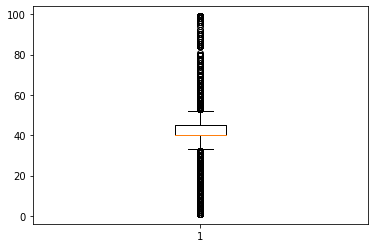

In [24]:
plt.boxplot(df_train['Jam per Minggu'])

In [25]:
#Memberikan label pada jam kerja
e,f = pd.cut(df_train['Jam per Minggu'],3, labels=[1,2,3],retbins=True)
df_train['Jam per Minggu']=pd.cut(df_train['Jam per Minggu'],bins=f, labels=[1,2,3])
df_test['Jam per Minggu']=pd.cut(df_test['Jam per Minggu'],bins=f, labels=[1,2,3])

In [26]:
gaji_n = []
gaji = df_train['Gaji']
for i in gaji:
    if i == '<=7jt':
        gaji_n.append(0)
    elif i == '>7jt':
        gaji_n.append(1)
    
df_gaji = pd.DataFrame(gaji_n)

In [27]:
df_train['f Gaji'] = gaji_n

In [28]:
df_train.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,f Gaji
id,,,,,,,,,,,,,
0,1,8,8,14,9,0,10,1,1,1,2,<=7jt,0
1,2,8,4,4,6,2,2,1,1,1,2,<=7jt,0
2,2,8,3,7,12,4,2,0,1,1,2,>7jt,1
3,1,8,6,10,13,0,11,0,1,1,2,<=7jt,0
4,1,8,7,11,14,4,11,0,2,1,2,>7jt,1


---------

In [29]:
array_train = df_train.drop(['Gaji'], axis=1).values

X = array_train[:, :-1]
y = array_train[:, -1]

In [30]:
y = y.astype('int')

In [31]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=21)

In [32]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=200)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.831186 (0.004041)
LDA: 0.824935 (0.003374)
KNN: 0.812988 (0.005578)
CART: 0.807293 (0.005256)
NB: 0.792047 (0.003856)
SVM: 0.833791 (0.004158)
RFC: 0.827400 (0.005628)


-------
menggunakan logistic regression

In [42]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = model.predict(X_validation)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8312265592443395
[[5082  376]
 [ 839  902]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5458
           1       0.71      0.52      0.60      1741

    accuracy                           0.83      7199
   macro avg       0.78      0.72      0.75      7199
weighted avg       0.82      0.83      0.82      7199



In [45]:
array_test = df_test.drop(['id'], axis=1).values
X_test = array_test[:, :]
X_test

array([[1, 3, 2, ..., 1, 1, 2],
       [1, 8, 7, ..., 1, 1, 2],
       [1, 5, 7, ..., 1, 1, 2],
       ...,
       [1, 8, 8, ..., 1, 1, 1],
       [1, 3, 8, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 1, 3]], dtype=object)

In [46]:
predictions_test = model.predict(X_test)
df_pred = pd.DataFrame(predictions_test)
df_pred.groupby(0).size()

0
0    7971
1    1628
dtype: int64

In [47]:
id = df_test['id']
gaji = predictions_test
d = {'col1': id, 'col2': gaji}
df_temp = pd.DataFrame(data=d)
df_result = df_temp.rename(columns={'col1':'id', 'col2':'Gaji'})
df_result

,id,Gaji
0,35994,0
1,35995,0
2,35996,0
3,35997,1
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0


In [48]:
df_result.to_csv('final_project5.csv', index=False)

-------
menggunakan svc

In [34]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
predictions = model.predict(X_validation)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8358105292401723
[[5081  377]
 [ 805  936]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5458
           1       0.71      0.54      0.61      1741

    accuracy                           0.84      7199
   macro avg       0.79      0.73      0.75      7199
weighted avg       0.83      0.84      0.83      7199



In [37]:
array_test = df_test.drop(['id'], axis=1).values
X_test = array_test[:, :]
X_test

array([[1, 3, 2, ..., 1, 1, 2],
       [1, 8, 7, ..., 1, 1, 2],
       [1, 5, 7, ..., 1, 1, 2],
       ...,
       [1, 8, 8, ..., 1, 1, 1],
       [1, 3, 8, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 1, 3]], dtype=object)

In [38]:
predictions_test = model.predict(X_test)
df_pred = pd.DataFrame(predictions_test)
df_pred

,0
0,0
1,0
2,0
3,1
4,0
...,...
9594,0
9595,0
9596,0
9597,0


In [39]:
df_pred.groupby(0).size()

0
0    7999
1    1600
dtype: int64

In [40]:
id = df_test['id']
gaji = predictions_test
d = {'col1': id, 'col2': gaji}
df_temp = pd.DataFrame(data=d)
df_result = df_temp.rename(columns={'col1':'id', 'col2':'Gaji'})
df_result

,id,Gaji
0,35994,0
1,35995,0
2,35996,0
3,35997,1
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0


In [41]:
df_result.to_csv('final_project2.csv', index=False)

-------
menggunakan decision tree classifier

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
predictions = model.predict(X_validation)

In [40]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [41]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8255313237949715
[[5262  196]
 [1060  681]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5458
           1       0.78      0.39      0.52      1741

    accuracy                           0.83      7199
   macro avg       0.80      0.68      0.71      7199
weighted avg       0.82      0.83      0.80      7199



-----

In [43]:
array_test = df_test.values
X_test = array_test[:, -7:]
X_test

array([[0.0, 0.0, 40.0, ..., 5, 5, 5],
       [0.0, 0.0, 50.0, ..., 3, 3, 3],
       [0.0, 0.0, 40.0, ..., 5, 5, 5],
       ...,
       [0.0, 0.0, 32.0, ..., 10, 10, 10],
       [0.0, 0.0, 40.0, ..., 5, 5, 5],
       [0.0, 0.0, 80.0, ..., 8, 8, 8]], dtype=object)

In [44]:
predictions_test = model.predict(X_test)

In [45]:
df_pred = pd.DataFrame(predictions_test)

In [46]:
df_pred.groupby(0).size()

0
0    8437
1    1162
dtype: int64

In [47]:
df_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
9594,0
9595,0
9596,0
9597,0


In [113]:
id = df_test['id']
gaji = predictions_test
d = {'col1': id, 'col2': gaji}

In [140]:
df_temp = pd.DataFrame(data=d)

In [141]:
df_result = df_temp.rename(columns={'col1':'id', 'col2':'Gaji'})

In [142]:
df_result

,id,Gaji
0,35994,0
1,35995,0
2,35996,0
3,35997,0
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0


In [144]:
df_result.to_csv('final_project1.csv', index=False)